# Concatenating and Joining Data

In [3]:
import pandas as pd

## Baby Names

The [Social Security Administration](https://www.ssa.gov/oact/babynames/) records the name of every baby born in the United States each year. They provide lists of baby names and their counts.

Before proceeding, [read more about this data set here](https://dlsun.github.io/pods/data/names/).

1\. Read in the data for the year that you were born. Some starter code is provided for you below. Note that the data files do not contain column names, so you have to specify them yourself using `names=`.

In [4]:
# YOUR CODE HERE


data_dir = "http://dlsun.github.io/pods/data/names/"
df_2000 = pd.read_csv(data_dir + "yob2000.txt",
                        header=None,
                        names=["Name", "Sex", "Count"])
df_2000

,Name,Sex,Count
0,Emily,F,25953
1,Hannah,F,23075
2,Madison,F,19967
3,Ashley,F,17997
4,Sarah,F,17689
...,...,...,...
29759,Zeph,M,5
29760,Zeven,M,5
29761,Ziggy,M,5
29762,Zo,M,5


2\. How many babies with your name were born in the U.S. in the same year as you? (Even if you have a rare name, you might be surprised!)

In [5]:
# YOUR CODE HERE
df_2002 = pd.read_csv(data_dir + "yob2002.txt",
                      header=None,
                      names=["Name", "Sex", "Count"])
df_2002

,Name,Sex,Count
0,Emily,F,24459
1,Madison,F,21772
2,Hannah,F,18817
3,Emma,F,16531
4,Alexis,F,15634
...,...,...,...
30554,Zimri,M,5
30555,Zoran,M,5
30556,Zyen,M,5
30557,Zylan,M,5


In [6]:
df_2002[df_2002["Name"] == "Ishaan"]["Count"].sum()

68

3\. Use the data for the year you were born from above. Now, also read in the data for 2020. Which male/female names increased/decreased in popularity the most? (You might want to restrict attention to names with at least some number of occurrences in 2000, say 100.)

In [7]:
# YOUR CODE HERE
df_2020 = pd.read_csv(data_dir + "yob2020.txt",
                      header=None,
                      names=["Name", "Sex", "Count"])

df_2020

,Name,Sex,Count
0,Olivia,F,17641
1,Emma,F,15656
2,Ava,F,13160
3,Charlotte,F,13065
4,Sophia,F,13036
...,...,...,...
31448,Zykell,M,5
31449,Zylus,M,5
31450,Zymari,M,5
31451,Zyn,M,5


In [8]:
df_2002_restrict = df_2002[df_2002["Count"] > 100]

merged = df_2002.merge(df_2020, on=["Name", "Sex"], suffixes=["2002", "2020"])

merged["Change"] = (merged["Count2020"] - merged["Count2002"]) / merged["Count2002"]

merged[merged["Change"] > 0].sort_values("Change", ascending=False).head()

,Name,Sex,Count2002,Count2020,Change
9010,Everly,F,6,4617,768.500000
7952,Alaia,F,8,2274,283.250000
9043,Harlow,F,6,958,158.666667
14999,Atlas,M,13,2049,156.615385
3998,Isla,F,29,4564,156.379310


In [9]:
merged[merged["Change"] < 0].sort_values("Change", ascending=True).head()

,Name,Sex,Count2002,Count2020,Change
747,Katelin,F,324,5,-0.984568
417,Katlyn,F,694,11,-0.984150
240,Jaden,F,1324,32,-0.975831
905,Maegan,F,248,6,-0.975806
316,Alexus,F,968,25,-0.974174


4\. How would you define a "unisex" name? Propose a definition that you can calculate using this data. Using your definition, what was the most common unisex name in 2020? Although this exercise only involves only the 2020 dataset, it can be solved using joins! (You might want to restrict attention to names with at least some number of occurrences in 2000, say 100.)

In [68]:
# YOUR CODE HERE
import numpy as np

df_2020_males = df_2020[df_2020["Sex"] == 'M']
df_2020_fem = df_2020[df_2020["Sex"] == 'F']

df_2020_self_merge = df_2020_fem.merge(df_2020_males, on=["Name"], suffixes=["_F","_M"], how="inner")

df_2020_self_merge

,Name,Sex_F,Count_F,Sex_M,Count_M
0,Olivia,F,17641,M,12
1,Emma,F,15656,M,18
2,Ava,F,13160,M,11
3,Charlotte,F,13065,M,6
4,Sophia,F,13036,M,11
...,...,...,...,...,...
2682,Yunuen,F,5,M,5
2683,Zaide,F,5,M,5
2684,Zayd,F,5,M,301
2685,Ziaire,F,5,M,78


In [78]:
df_2020_self_merge["Unisex"] = np.abs(df_2020_self_merge["Count_F"] - df_2020_self_merge["Count_M"]) / (df_2020_self_merge["Count_F"] + df_2020_self_merge["Count_M"])

df_2020_self_merge.sort_values("Unisex", ascending=True)

,Name,Sex_F,Count_F,Sex_M,Count_M,Unisex
2463,Ameri,F,5,M,5,0.000000
1822,Aquila,F,10,M,10,0.000000
2488,Bryann,F,5,M,5,0.000000
2584,Lanier,F,5,M,5,0.000000
1912,Audi,F,9,M,9,0.000000
...,...,...,...,...,...,...
10,Camila,F,8148,M,6,0.998528
0,Olivia,F,17641,M,12,0.998640
2198,Lucas,F,7,M,11344,0.998767
5,Amelia,F,12767,M,6,0.999061


5\. Make a plot illustrating the popularity of your name evey year from 1981 to 2020. (If you have a rare name that does not appear in the data set, choose a friend's name.)

You will have to get information from 40 data sets; use a `for` loop.

In [82]:
# YOUR CODE HERE

df_names = pd.DataFrame()

for year in range(1980, 2021):
   names_year = pd.read_csv(data_dir + "yob{}.txt".format(year),
                        header=None,
                        names=["Name", "Sex", "Count"])
   names_year["year"] = year
   df_names = pd.concat([df_names, names_year], ignore_index = True)


df_names = df_names.fillna(0)

df_names
    


,Name,Sex,Count,year
0,Jennifer,F,58381,1980
1,Amanda,F,35819,1980
2,Jessica,F,33921,1980
3,Melissa,F,31632,1980
4,Sarah,F,25747,1980
...,...,...,...,...
1156464,Zykell,M,5,2020
1156465,Zylus,M,5,2020
1156466,Zymari,M,5,2020
1156467,Zyn,M,5,2020


<Axes: title={'center': "'Ishaan' (M) Name Popularity Over Time"}, xlabel='year'>

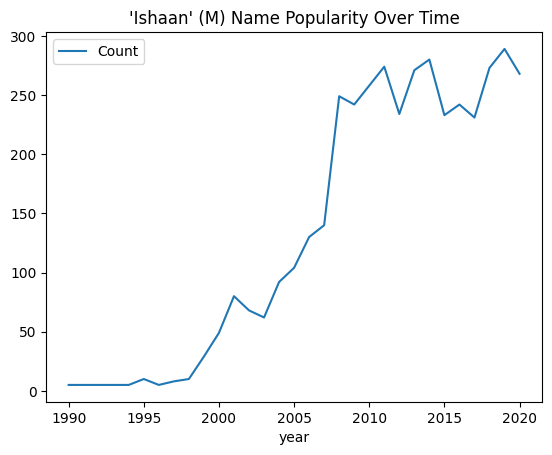

In [96]:
import matplotlib.pyplot as plt

df_names[df_names["Name"] == "Ishaan"].plot(x="year", y="Count", title="'Ishaan' (M) Name Popularity Over Time")

## Movie Ratings Data

The Movielens data set (https://dlsun.github.io/pods/data/ml-1m/ ) contains 1 million movie ratings submitted by users. The information about the movies, ratings, and users are stored in three separate files, called `movies.dat`, `ratings.dat`, and `users.dat`. The column names are not included with the data files. Refer to the webpage above for more information.


1\. Read in each of the data files.


(Hint: see the note in the documentation about the delimiter; use the `sep` argument in `read_csv`. If you get an error when reading the `movies.dat` file, try `encoding_errors = "ignore"` in `read_csv`.)

In [91]:
# YOUR CODE HERE
movies = pd.read_csv("https://dlsun.github.io/pods/data/ml-1m/movies.dat",
                        sep="::",
                        encoding_errors="ignore",
                        names=["MovieID", "Title", "Genres"])
movies

/var/folders/q8/mqm68gfx7pjfpqftf7y_v6140000gn/T/ipykernel_82449/2753667803.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies = pd.read_csv("https://dlsun.github.io/pods/data/ml-1m/movies.dat",


,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [98]:
ratings = pd.read_csv("https://dlsun.github.io/pods/data/ml-1m/ratings.dat",
                        sep="::",
                        encoding_errors="ignore",
                        names=["UserID", "MovieID", "Rating", "Timestamp"])

ratings

/var/folders/q8/mqm68gfx7pjfpqftf7y_v6140000gn/T/ipykernel_82449/3190534923.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_csv("https://dlsun.github.io/pods/data/ml-1m/ratings.dat",


,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [99]:
users = pd.read_csv("https://dlsun.github.io/pods/data/ml-1m/users.dat",
                        sep="::",
                        encoding_errors="ignore",
                        names=["UserID", "Gender", "Age", "Occupation", "Zip-code"])

users

/var/folders/q8/mqm68gfx7pjfpqftf7y_v6140000gn/T/ipykernel_82449/3351467121.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users = pd.read_csv("https://dlsun.github.io/pods/data/ml-1m/users.dat",


,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


2\. Which age group tends to give the highest ratings? Create an appropriate summary to answer this question.

(Note the way age is coded in the [REAMDE file](https://dlsun.github.io/pods/data/ml-1m/README.txt).)

In [101]:
# YOUR CODE HERE
merge1 = movies.merge(ratings, on=["MovieID"], how="inner")
df_merged = merge1.merge(users, on=["UserID"], how="inner")

df_merged

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000204,3513,Rules of Engagement (2000),Drama|Thriller,5727,4,958489970,M,25,4,92843
1000205,3535,American Psycho (2000),Comedy|Horror|Thriller,5727,2,958489970,M,25,4,92843
1000206,3536,Keeping the Faith (2000),Comedy|Romance,5727,5,958489902,M,25,4,92843
1000207,3555,U-571 (2000),Action|Thriller,5727,3,958490699,M,25,4,92843


In [106]:
df_merged.groupby("Age")["Rating"].mean().sort_values(ascending=False)

Age
56    3.766632
50    3.714512
45    3.638062
35    3.618162
1     3.549520
25    3.545235
18    3.507573
Name: Rating, dtype: float64

3\. Among movies with at least 100 ratings, which movies had the highest average rating? The lowest?

In [111]:
# YOUR CODE HERE
df_100_ratings = df_merged.groupby("Title")["Rating"].count().reset_index(name="Count")

df_100_ratings



,Title,Count
0,"$1,000,000 Duck (1971)",37
1,'Night Mother (1986),70
2,'Til There Was You (1997),52
3,"'burbs, The (1989)",303
4,...And Justice for All (1979),199
...,...,...
3701,"Zed & Two Noughts, A (1985)",29
3702,Zero Effect (1998),301
3703,Zero Kelvin (Kjrlighetens kjtere) (1995),2
3704,Zeus and Roxanne (1997),23


4\. For each movie, calculate the average rating and the proportion of the ratings that were from users aged 18-24. Make a scatterplot showing the relationship between the average rating and the 18-24 share, with each point representing a movie. (Optional: Use the size of each point to represent the number of users who rated the movie.)

In [15]:
# YOUR CODE HERE

5\. Calculate the number of ratings by movie. How many of the movies had zero ratings?

(_Hint_: Why is an inner join not sufficient here?)

In [16]:
# YOUR CODE HERE

6\. How many movies received both a 1 and a 5 rating? Which movies? How many ratings of each type (1 or 5 stars)? Answer these question by joining two appropriate tables.

In [17]:
# YOUR CODE HERE